In [73]:
import networkx as nx
import matplotlib.pyplot as plt
from string import ascii_uppercase
import random
from collections import Counter

# ***Small World Networks***
-------------------------

In [2]:
# This is an idea that suggests that the world is small and we are all connected by very short paths.
# In Milgram Small world experiment researchers found that the hops needed for a piece of information to get to the target is relatively small
# i.e. a signle digit hops

# Not only that these paths are quite short but people were actually able to find them.

In [3]:
# In a research on Microsoft Instant Messenger involving 240, 000, 000 active users where researchers connected them when any two
# users were engaged in a two way communication
# The median distance of the shortest path between nodes (users) was 7

In [4]:
# In a similar study involving Facebook users
# The average path length was found to be 5.28 in 2008 and 4.74 in 2011

# This became even shorter when they imposed locale specific restrictions on the network
# i.e. network with totally random Facebook users had median shortest path lengths larger than a network of Facebook users exclusively from USA.
# This would further decrease if we apply more restrictions e.g. users only from Florida, USA

In [5]:
# Clustering coefficient

# Local clustering coefficient = a node's friends who are actually friends with one another / a node's all possible friend pairs

# In Microsoft Instant Messenger network the average cc was 0.13
# In IMDB actor network, average cc was 0.78

# These are high because these are totally random connections in huge networks (even though the values may appear small)

In [6]:
# Social networks tend to have a high clustering coefficient
# They also tend to have very short averages path lengths

## ***Can any model generate this type of networks?***

In [7]:
# Can preferential attachement model work here?

In [8]:
# allowing the new node to attach to 4 existing nodes

graph = nx.barabasi_albert_graph(n = 1_000_000, m = 4)

In [9]:
nx.average_clustering(graph)

0.00014039573729406852

In [ ]:
# average cc of a network generated by the Preferential attachment model fails to give a large cc :(

In [ ]:
# Takes too long

nx.average_shortest_path_length(graph);

In [ ]:
# However the average path length is small enough
# Preferential attachment model succeeds in achieving small average path lengths while failing to achieve large average ccs

In [12]:
# Let's change the number of nodes and the number of nodes a new node connects to to see if there are any changes!

# keys are m values
cc = dict()
spath = dict()

for m in range(2, 12, 2):
    
    _ccs = list()
    _spaths = list()
    
    for n in range(500, 2000, 100):
    
        _graph = nx.barabasi_albert_graph(n = n, m = m)
        _ccs.append(nx.average_clustering(_graph))
        _spaths.append(nx.average_shortest_path_length(_graph))
    
    cc[m] = _ccs
    spath[m] = _spaths

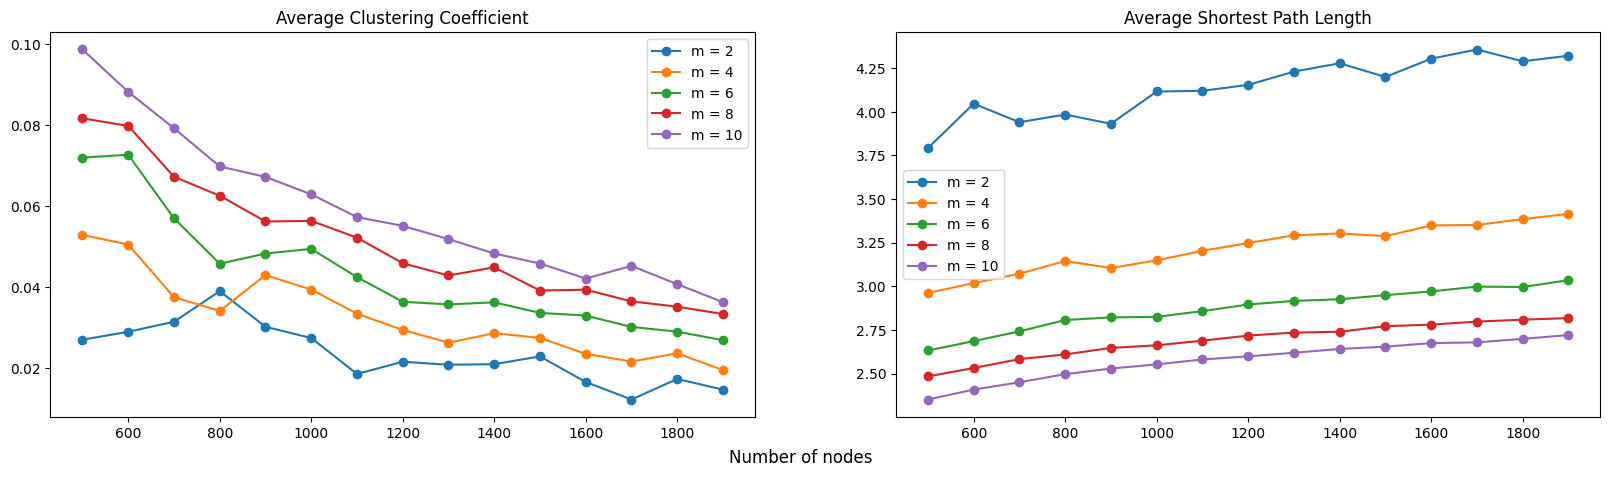

In [32]:
fig, (axes_0, axes_1) = plt.subplots(nrows = 1, ncols = 2, sharey = False)
fig.set_size_inches(20, 5)
axes_0.set_title("Average Clustering Coefficient")
axes_1.set_title("Average Shortest Path Length")
fig.supxlabel("Number of nodes")

for m in range(2, 12, 2):
    axes_0.plot(range(500, 2000, 100), cc.get(m), label = f"m = {m}", marker = "o")
    axes_1.plot( range(500, 2000, 100), spath.get(m), label = f"m = {m}", marker = "o")

axes_0.legend()
axes_1.legend()
plt.show()

In [ ]:
# Small average paths in these networks come from the fact that in Power law distribution, some nodes have very very high degrees
# Such that they functon as hubs bridging many other nodes.
# These type of nodes are the reason ofr Power law distributions having a fairly small average shortest path

## ***Small world model***

In [2]:
# Here you start with a ring of n nodes, where each node is connected to k nearest neighbours.
# fix another parameter p ∈ [0, 1]
# consider each egde e.g (u, v);
# with probability p, pick a node w at random & rewire the edge such that it (u, v) becomes (u, w).
# with probability p means that we will decide whether to rewire or not with a probability p
# repeat this for all pair of edges.

In [5]:
nodes = list(ascii_uppercase)[:12]
nodes

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']

In [55]:
# k = 2s, p = 0.4

edges = [[nodes[i], nodes[i + 1]] for i in range(len(nodes) - 1)] + [["L", "A"]]
edges

[['A', 'B'],
 ['B', 'C'],
 ['C', 'D'],
 ['D', 'E'],
 ['E', 'F'],
 ['F', 'G'],
 ['G', 'H'],
 ['H', 'I'],
 ['I', 'J'],
 ['J', 'K'],
 ['K', 'L'],
 ['L', 'A']]

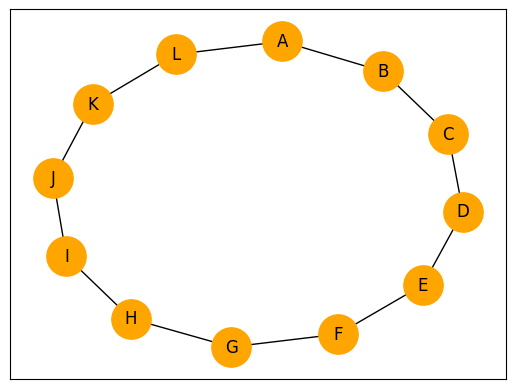

In [26]:
# Original graph

graph = nx.Graph()
graph.add_edges_from(edges)
nx.draw_networkx(graph, node_color = "orange", node_size = 800)

In [60]:
# rewiring logic
p = 0.4
rewired_edges = edges[:]

for edge in rewired_edges:
    # if chosen to rewire (rewire with a probability 0.4)
    if random.choices(population = [True, False], weights = [p, (1 - p)], k = 1)[0]:
        # rewire it
        edge[1] = random.sample([node for node in nodes if node != edge[0]], k = 1)[0]

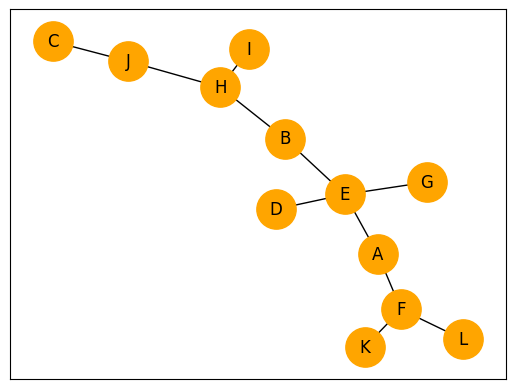

In [61]:
# Rewired graph

graph = nx.Graph()
graph.add_edges_from(rewired_edges)
nx.draw_networkx(graph, node_color = "orange", node_size = 800)

In [62]:
# When there is no rewiring,
# adjacent nodes may be linked but there will be less bridges connecting long distances (few chances for long jumps)
# so long paths will take more hops in the absence of bridging hubs.
# expect a large average path length

# if all edges are rewired,
# this leads to a completely random graph
# possibly has small distances
# but the initial structure of the graph is destroyed completely
# so there is less triangles
# lower clustering coefficient :(

In [63]:
# However one can find a sweet spot between these two extremes.
# here some edges get rewired while others not.

In [64]:
# when p increases from 0 to 0.1,
# average shortest path decreases rapidly
# average cc decreases slowly

In [71]:
# Small world graphs in NetworkX
# at start each node is connected to 4 nearest neighbours
# rewiring with a 0.05 probability

graph = nx.watts_strogatz_graph(n = 10_000, k = 4, p = 0.05)

In [77]:
data = Counter([degree for (node, degree) in graph.degree()])

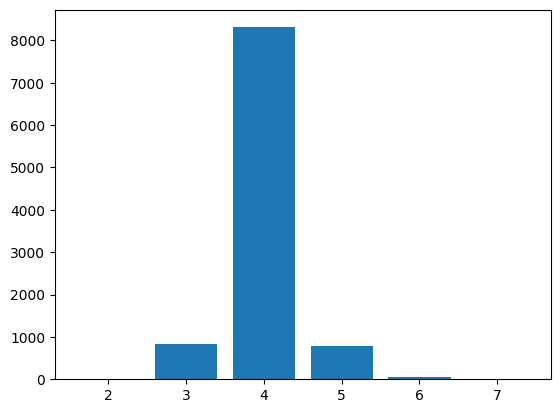

In [79]:
plt.bar(x = data.keys(), height = data.values())
plt.show()

In [ ]:
# 4 is the most common degree
# this makes sense since the rewiring probability is 0.05
# so most edges aren't going to be rewired
# so will retain the original degrees

# This model does not subscribe to the Power law degree distribution